# Chapter 1: Install Jupyter Notebook and PyTorch




***
***“Life is short (You need Python).”***



-- Bruce Eckel, author of *Think in Java* and *Think in C++* 
***

I assume you have a working knowledge of Python. To follow the content in the book, you need to know the Python basics such as functions, classes, lists, dictionaries and so on. If not, there are plenty of free resources online to get you started. My favorite is the Python tutorial provided by W3Schools (https://www.w3schools.com/python/) and you can get started even without installing Python on your computer. You can run examples on their website through an interactive window.

In this chapter, you'll install Python by first installing Anaconda on your computer. You'll then create a virtual environment for this book. We'll use Jupyter Notebook as the interactive development environment (IDE) so you'll also learn how to install it on your computer. 

All the magic output (text, images, music...) in this book will be generated with deep neural networks. Some networks have a large number of parameters. For example, GPT-4 has 100 trillion parameters. The transformer model we cover in this book has 1.5 billion parameters. Training large neural networks is extremely time-consuming. PyTorch is a library that can train neural networks on GPUs, hence dramatically reducing the training time. Therefore, you'll learn to install PyTorch in this chapter. In case you don't have a CUDA-enabled GPU installed on your computer, all programs in this book are compatible with CPU training as well. Better yet, I'll provide the trained models on the book's GitHub repository https://github.com/markhliu/DGAI so you can see the trained models in action. 

After that, we'll cover the basics of PyTorch by discussing different data types, tensors, and how to use them. 

# 1. Install Python and Jupyter Notebook

## 1.1. Install Anaconda
To install Python via Anaconda, go to the following website https://www.anaconda.com/products/individual and scroll down to the bottom of the page. Then download the latest version of Python 3 for your operating system (Windows, MAC, or Linux), and install it.

## 1.2. Create A Virtual Environment
It's highly recommended that you create a separate virtual environment for this book. Let’s name the virtual environment *dgai*, as in Demystify Generative AI. Feel free to use a of your choice, but I'll use *dgai* as the example in this book. Enter the following command in the Anaconda prompt (Windows) or a terminal (Mac and Linux):

`conda create -n dgai`

After pressing the ENTER key on your keyboard, follow the instructions on the screen and press y when the prompt asks you y/n. 

## 1.3. Set Up Jupyter Notebook in the Virtual Environment
Now we need to set up Jupyter Notebook in the newly created virtual environment on your computer.
First, activate the virtual environment by running the following line of code in the Anaconda prompt (in Windows) or a terminal (in Mac or Linux):

`
conda ctivate dgai
`

To install Jupyter Notebook in the virtual environment, run the command 

`
conda install notebook
`

To launch Jupyter Notebook, execute the following command in the same terminal with the virtual environment activated:

`
jupyter notebook
`

# 2. Install PyTorch

Generative AI uses deep neural networks, which can have a large number of parameters. For example, the latest version of generative pre-trained transformers (GPTs), GPT-4, has one trillion parameters. As a result, training these models is extremely time-consuming. Training deep neural networks on GPUs can be as much as 50 times faster than doing so on CPUs instead. 

However, you don't necessarily have to buy a NVIDIA GPU just for this book. You can skip training in certain parts of the book and use pre-trained models to see results. 

Below, I'll summarize how to install PyTorch with and without GPUs. 

## 2.1. Install PyTorch without GPUs

To install PyTorch with CPU training, first activate the virtual environment by running the following line of code in the Anaconda prompt (in Windows) or a terminal (in Mac or Linux):

`
conda ctivate dgai
`

You should be able to see *(dgai)* in front of your prompt, which indicates that you are now in the *dgai* virtual environment. To install PyTorch, issue the following line of command:

`
pip install pytorch torchaudio torchvision
`

Follow the on-screen instructions to finish the installation. Here we install three libraries together: PyTorch, Torchaudio, and Torchvision. Torchaudio is a library to process audio and signals and we need it to generate music later in this book. We'll also use the Torchvision library extensively in the book to process images.  

## 2.2. Install PyTorch with GPUs

GPU training is only available on Windows or Linux, not on Mac. To install PyTorch with GPU training, first make sure you have a NVIDIA GPU installed on your computer. Then follow the instructions on the PyTorch website here https://pytorch.org/get-started/locally/. 

For example, I am using Windows operating system, and I first install CUDA toolkit 11.8 by following instructions here https://developer.nvidia.com/cuda-downloads. Then download the CUDA Deep Neural Network libary by following, e.g., instructions from this post https://pub.towardsai.net/installing-pytorch-with-cuda-support-on-windows-10-a38b1134535e. After that, activate the virtual environment by running the following line of code in the Anaconda prompt:

`
conda ctivate dgai
`

You should be able to see *(dgai)* in front of your prompt, which indicates that you are now in the *dgai* virtual environment. To install PyTorch, issue the following line of command:

`
pip3 install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
`

Follow the on-screen instructions to finish the installation. Here we install four libraries together: PyTorch, Torchaudio, and Torchvision. Torchaudio is a library to process audio and signals and we need it to generate music later in this book. We'll also use the Torchvision library extensively in the book to process images. Finally, we build from source the prebuilt wheels for CUDA 11.8. Your version of CUDA is likely to change so you should change the installation accordingly. 

## 2.3. Check PyTorch Installation
To make sure you have PyTorch correctly installed, run the following lines of code in a new cell in Jupyter Notebook:

In [1]:
import torch

device="cuda" if torch.cuda.is_available() else "cpu"
print(device)

cuda


The output above says *cuda*, indicating that GPU training is available on my computer. If you don't have cuda-enabled GPU on your computer, the output is *cpu*. 

# 3. PyTorch Tensors
We'll discuss the data structure in PyTorch in this section by using the age and height of the 46 U.S. presidents as examples. 

## 3.1. Create PyTorch Tensors

We’ll use datasets from a wide range of sources and formats in this book: text corpus, images, audio clips, or anything really. No matter what the format is, the first step in deep learning is to transform the inputs into arrays of numbers. In PyTorch, these arrays of numbers are called tensors. 

Let's say that we have collected the heights of the 46 U.S. president in centimeters and stored them in a Python list, as follows:

In [2]:
heights = [189, 170, 189, 163, 183, 171, 185,
           168, 173, 183, 173, 173, 175, 178,
           183, 193, 178, 173, 174, 183, 183,
           180, 168, 180, 170, 178, 182, 180,
           183, 178, 182, 188, 175, 179, 183,
           193, 182, 183, 177, 185, 188, 188,
           182, 185, 191, 183]

The numbers are in chronological order: the first value in the list, 189, indicates that the first U.S. president, George Washington, was 189 centimeters tall. The last value shows that Joe Biden's height is 183 centimeters. We can convert a Python list into a PyTorch tensor by using the *tensor()* method in PyTorch, like so:

In [3]:
heights_tensor = torch.tensor(heights, dtype=torch.float64)

We specify the data type by using the *dtype* argument in the *tensor()* method. The default data type in PyTorch tensors is *float32*, a 32-bit floating-point number. In the above cell, we converted the heights into *float64*, double-precision floating-point numbers. Other data types in PyTorch tensors include:
* float16: double-precision floating-point numbers
* bool: Booleans or bools, which take values True or False
* uint8: unsigned 8-bit integers
* int8: signed 8-bit integers
* int16: signed 16-bit integers
* int32: signed 32-bit integers
* int64: signed 64-bit integers

Many times, you need to create a PyTorch tensor with values 0 everywhere. For example, to generate a tensor with a shape of two rows and three columns, you can use the *zeros()* method as follows:

In [4]:
tensor1 = torch.zeros(2, 3)
print(tensor1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])


Here, we didn't specify the data type and the output has the default data type of *float32*. To generate a tensor with values 1 everywhere, you can use the *ones()* method like this:

In [5]:
tensor2 = torch.ones(1,4,5)
print(tensor2)

tensor([[[1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.],
         [1., 1., 1., 1., 1.]]])


We have generated a 3-dimensional PyTorch tensor. The shapes of the three axes are 1, 4, and 5, respectively. 

## 3.2. Index and Slice PyTorch Tensors
We use square brackets ([ ]) to index and slice PyTorch tensors, as we do with Python lists. To continue our example of the heights of the 46 U.S. presidents, if we want to access the height of the third president, Thomas Jefferson, we can do the following:

In [6]:
height = heights_tensor[2]
print(height)

tensor(189., dtype=torch.float64)


The output shows that the height of Thomas Jefferson was 189 centimeters tall. We can use negative indexing to count from the back of the tensor. For example, to find out the height of Donald Trump, which is the second to last president in the list, we use index -2, as follows:

In [7]:
height = heights_tensor[-2]
print(height)

tensor(191., dtype=torch.float64)


The output shows that Trump's height is 191 centimeters. 

What if we want to know the heights of the last five presidents in the list? We can obtain a slice of the tensor like this:

In [8]:
five_heights = heights_tensor[-5:]
print(five_heights)

tensor([188., 182., 185., 191., 183.], dtype=torch.float64)


The results show that the last five presidents in the list (Bush, Clinton, Obama, Trump, and Biden) are 188, 182, 185, 191, and 183 centimeters tall, respectively. 

## 3.3. PyTorch Tensor Shapes
PyTorch tensors has an attribute *shape*, which tells the dimensions of a tensor. For example, if we want to find out the shape of the tensor *heights_tensor*, we can do this:

In [9]:
print(heights_tensor.shape)

torch.Size([46])


This tells us that *heights_tensor* is a one-dimensional tensor with 46 values in it. 

Now, let's convert the heights from centimeters to feet. Since a foot is about 30.48 centimeters, we can accomplish this by dividing the tensor by 30.48:

In [10]:
heights_in_feet = heights_tensor / 30.48
print(heights_in_feet)

tensor([6.2008, 5.5774, 6.2008, 5.3478, 6.0039, 5.6102, 6.0696, 5.5118, 5.6759,
        6.0039, 5.6759, 5.6759, 5.7415, 5.8399, 6.0039, 6.3320, 5.8399, 5.6759,
        5.7087, 6.0039, 6.0039, 5.9055, 5.5118, 5.9055, 5.5774, 5.8399, 5.9711,
        5.9055, 6.0039, 5.8399, 5.9711, 6.1680, 5.7415, 5.8727, 6.0039, 6.3320,
        5.9711, 6.0039, 5.8071, 6.0696, 6.1680, 6.1680, 5.9711, 6.0696, 6.2664,
        6.0039], dtype=torch.float64)


Now the new tensor, *heights_in_feet*, stores the heights in feet. For example, the last value in the tensor shows that Joe Biden is 6.0039 feet tall. We can use the *cat()* method in PyTorch to concatenate the two tensors:

In [11]:
heights_2_measures = torch.cat(
    [heights_tensor,heights_in_feet], dim=0)
print(heights_2_measures.shape)

torch.Size([92])


The resulting tensor is one-dimensional with 92 values. We can reshape it into two rows and 46 columns so that the first row represents heights in centimeters and the second in feet:

In [12]:
heights_reshaped = heights_2_measures.reshape(2, 46)
print(heights_reshaped)

tensor([[189.0000, 170.0000, 189.0000, 163.0000, 183.0000, 171.0000, 185.0000,
         168.0000, 173.0000, 183.0000, 173.0000, 173.0000, 175.0000, 178.0000,
         183.0000, 193.0000, 178.0000, 173.0000, 174.0000, 183.0000, 183.0000,
         180.0000, 168.0000, 180.0000, 170.0000, 178.0000, 182.0000, 180.0000,
         183.0000, 178.0000, 182.0000, 188.0000, 175.0000, 179.0000, 183.0000,
         193.0000, 182.0000, 183.0000, 177.0000, 185.0000, 188.0000, 188.0000,
         182.0000, 185.0000, 191.0000, 183.0000],
        [  6.2008,   5.5774,   6.2008,   5.3478,   6.0039,   5.6102,   6.0696,
           5.5118,   5.6759,   6.0039,   5.6759,   5.6759,   5.7415,   5.8399,
           6.0039,   6.3320,   5.8399,   5.6759,   5.7087,   6.0039,   6.0039,
           5.9055,   5.5118,   5.9055,   5.5774,   5.8399,   5.9711,   5.9055,
           6.0039,   5.8399,   5.9711,   6.1680,   5.7415,   5.8727,   6.0039,
           6.3320,   5.9711,   6.0039,   5.8071,   6.0696,   6.1680,   6.1680,
  

The new tensor, *heights_reshaped*, is two-dimensional now. We can print out its shape and size as follows:

In [13]:
print(heights_reshaped.shape)

torch.Size([2, 46])


The tensor, *heights_reshaped*, has a shape of 2 by 46: the axis 0 has two values and the axis 1 has 46 values. We can index and slice multi-dimensional tensors using the square bracket. For example, to print out the height of Trump in feet, we can do this:

In [14]:
print(heights_reshaped[1,-2])

tensor(6.2664, dtype=torch.float64)


The command *heights_reshaped[1,-2]* tells Python to look for the value in the second row, the second to last column, which returns Trump's height in feet, 6.2664. 

## 3.4. Mathematical Operations on PyTorch Tensors
We can conduct mathematical operations on PyTorch tensors by using different methods such as mean(), median(), sum(), max(), and so on. For example, to find the median height of the 46 presidents in centimeters, we can do this:

In [15]:
print(torch.median(heights_reshaped[0,:]))

tensor(182., dtype=torch.float64)


To find out the average height in both rows, we can use the *dim=1* argument in the *mean()* method:

In [16]:
print(torch.mean(heights_reshaped,dim=1))

tensor([180.0652,   5.9077], dtype=torch.float64)


The results show that the average height is 180.0652 centimeters, or equivalently, 5.9077 feet. 

To find out the tallest president, we can do this:

In [17]:
values, indices = torch.max(heights_reshaped, dim=1)
print(values)
print(indices)

tensor([193.0000,   6.3320], dtype=torch.float64)
tensor([15, 15])


The *torch.max()* method returns two tensors: a tensor *values* with the tallest president's height in centimeters and in feet, and a tensor *indices* with the indexes of the president with the maximum height. The results show that the 16th president (Lincoln) is the tallest, at 193 centimeters, or 6.332 feet. 

# 4. Calculate Gradients in PyTorch
Machine learning can be summarized in three words: initialize, adjust, and repeat. In the first step, a machine learning model assigns values to parameters (initialize). In the second step, the model makes predictions based on the parameters and compares predictions with the actual values, i.e., labels; it changes the parameters so that the predictions will move closer to the actual values (adjust); Finally, the model repeats step 2 many iterations until the parameters converge (repeat).

The question is: how should the model adjust the parameters? The answer lies in the gradient decent algorithm: in each iteration, the model adjusts the parameters by $-lr*gradient$, where lr is the learning rate, and *gradient* is the gradient of the parameters at the current value. 

Below, we'll use a simple example to show how PyTorch tensors automatically keep track of the gradients so the optimization problem becomes easy to implement. 

## 4.1. Set Up the Problem
Assume that you generated dataset $(x, y)$ and the true relation between the two is $$y = x^2-3x+2$$ and we know the relation is quadratic but don't know the exact functional form. That is, we know the relation between $x$ and $y$ is $$y = ax^2+bx+c$$ but we need to use the gradient decent algorithm to estimate the parameters a, b, and c.  

Let's first generate the data as follows:

In [18]:
x=torch.linspace(-10,10,1000)
y=x**2-3*x+2

In the above code cell, the *linspace()* method generates 1000 data points between -10 and 10, evenly spaced. We can plot the y against x by using the *matplotlib* library. If you haven't installed the *matplotlib* library on your computer, run this line of code in a new cell

In [19]:
!pip install matplotlib

To plot the true relation between x and y, run the following code cell:

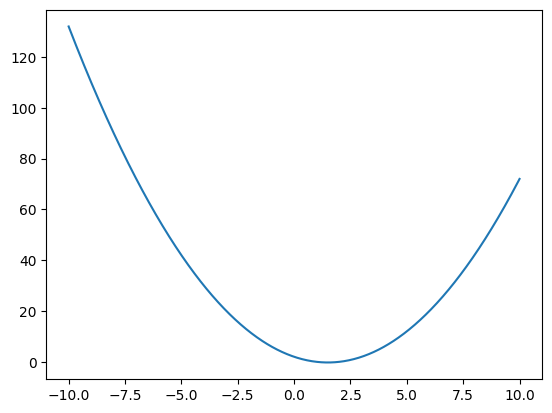

In [20]:
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

plt.plot(x,y)

Next, we'll estimate the values of a, b, and c in $y = ax^2+bx+c$ by using the gradient decent algorithm. 

## 4.2. Implement the Gradient Decent Algorithm

We first randomly initialize the parameter values by using the *randn()* method in PyTorch:

In [21]:
a=torch.randn((),requires_grad=True)
b=torch.randn((),requires_grad=True)
c=torch.randn((),requires_grad=True)
print(a)
print(b)
print(c)

tensor(2.3932, requires_grad=True)
tensor(0.7542, requires_grad=True)
tensor(-0.8126, requires_grad=True)


We set the learning rate at 0.00001. Learning rate is a hyperparameter in machine learning that governs how fast we adjust the parameters. 

In [22]:
lr=0.00001

Next, we define a *train_epoch()* function to adjust the parameters once by using the gradient decent algorithm:

In [23]:
def train_epoch():
    global a,b,c
    # make predictions based on the current parameters
    predictions=a*(x**2)+b*x+c
    # calculate mean squared error
    loss=((predictions-y)**2).mean()
    # calculate the gradient of loss w.r.t. parameters
    loss.backward()
    # manually update the parameters 
    with torch.no_grad():
        a -= lr*a.grad
        b -= lr*b.grad        
        c -= lr*c.grad        
        # set gradient to zero after updating
        a.grad=None
        b.grad=None        
        c.grad=None        
    return loss.item()

We calculate the prediction of y based on current parameters. We then calculate the mean squared error loss. The *backward()* method calculates the gradient of the loss with respect to the parameters automatically for us. 

Next, we train the model for 10000 epochs, like this:

In [24]:
for epoch in range(1,10001,1):
    epoch_loss=train_epoch()
    if epoch%100==0:
        print(f"at epoch {epoch}, loss is {epoch_loss}")

at epoch 100, loss is 417.0484313964844
at epoch 200, loss is 364.3667297363281
at epoch 300, loss is 319.2234191894531
at epoch 400, loss is 279.72698974609375
at epoch 500, loss is 245.1707763671875
at epoch 600, loss is 214.9367218017578
at epoch 700, loss is 188.4841766357422
at epoch 800, loss is 165.34002685546875
at epoch 900, loss is 145.09043884277344
at epoch 1000, loss is 127.37327575683594
at epoch 1100, loss is 111.87175750732422
at epoch 1200, loss is 98.30870819091797
at epoch 1300, loss is 86.44152069091797
at epoch 1400, loss is 76.0582275390625
at epoch 1500, loss is 66.97306823730469
at epoch 1600, loss is 59.02377700805664
at epoch 1700, loss is 52.06813049316406
at epoch 1800, loss is 45.981849670410156
at epoch 1900, loss is 40.6561393737793
at epoch 2000, loss is 35.99599838256836
at epoch 2100, loss is 31.918088912963867
at epoch 2200, loss is 28.349590301513672
at epoch 2300, loss is 25.226720809936523
at epoch 2400, loss is 22.49380874633789
at epoch 2500, los

Now that the model is trained (that is, we have estimated the values of a, b, and c), we can see how close the prediction relative to the true values:

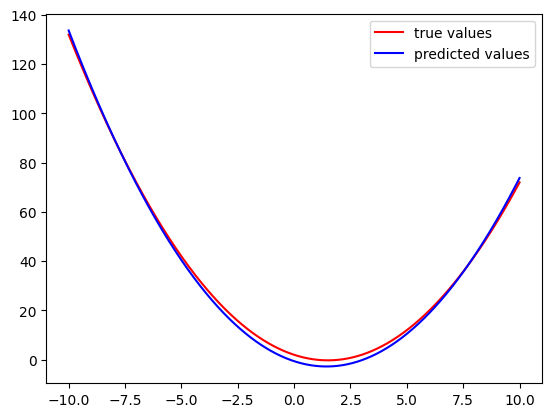

In [25]:
# predict the functional form
predictions=a*(x**2)+b*x+c
# plot the true shape in red
plt.plot(x,y,c="r",label="true values")
# plot the estimated shape in blue
plt.plot(x,predictions.detach(),c="b",label="predicted values")
plt.legend()
plt.show()

As you can see, the estimation does a fairly good job of approximating the true relation between x and y. 